# Data Preparation - Preprocessing Pipeline

## Import Libraries

In [24]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

## Import Data

In [25]:
iris = load_iris()
X = iris.data
y = iris.target

In [26]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

## Data Preparation

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Initial data:")
print(X_test[:5])

Initial data:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]


## Pipeline Construction

In [28]:
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('model', LogisticRegression())
])

SimpleImputer ==> handle missing data (strategy = 'mean' replaces missing values with the mean of the non-missing values in the corresponding feature).

StandardScaler ==> feature scaling (standardizes the feature values by subtracting the mean and dividing by the standard deviation).

PCA ==> dimensionality reduction (reduces the number of features while preserving the most important information)

LogisticRegression ==> model training

In [29]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

In [30]:
# Preprocessing intermediate steps
X_imputed = pipeline.named_steps['imputer'].transform(X_test)
X_scaled = pipeline.named_steps['scaler'].transform(X_imputed)
X_pca = pipeline.named_steps['pca'].transform(X_scaled)

In [31]:
print("Imputed data:")
print(X_imputed[:5])
print("Scaled data:")
print(X_scaled[:5])
print("PCA-transformed data:")
print(X_pca[:5])

Imputed data:
[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]]
Scaled data:
[[ 0.35451684 -0.58505976  0.55777524  0.02224751]
 [-0.13307079  1.65083742 -1.16139502 -1.17911778]
 [ 2.30486738 -1.0322392   1.8185001   1.49058286]
 [ 0.23261993 -0.36147005  0.44316389  0.4227026 ]
 [ 1.2077952  -0.58505976  0.61508092  0.28921757]]
PCA-transformed data:
[[ 0.67946575 -0.38500577]
 [-1.85948524  1.36754843]
 [ 3.37418698  0.08283354]
 [ 0.71543345 -0.20586539]
 [ 1.30528623 -0.03401018]]


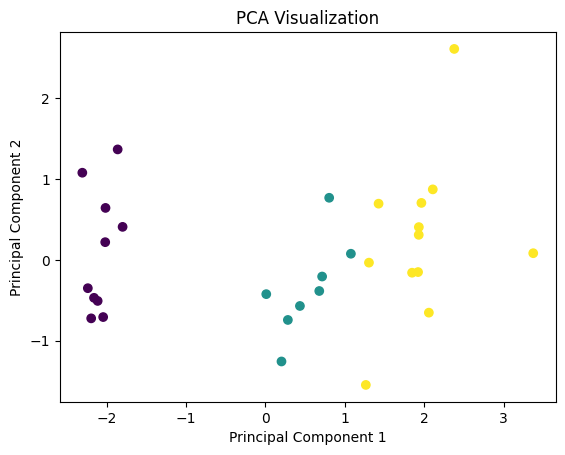

In [32]:
# Visualize the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

Different colors represent the predicted classes